In [ ]:
import os

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = ""

In [ ]:
%%capture
pip install langchain langchain-openai langchain-community

In [ ]:
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

question = "A store sells pencils at 2 for $1 and pens at $1 each. If Sarah buys 4 pencils and 3 pens, how much does she spend?"

# Zero-shot
zero_shot_prompt = f"Answer the question directly: {question}"

# One-shot
one_shot_prompt = f"""
Example:
Q: A shop sells apples at 3 for $2. How much for 6 apples?
A: 4 dollars

Now solve this:
Q: {question}
A:
"""

# Few-shot
few_shot_prompt = f"""
Examples:
Q: A book costs $5. How much for 3 books?
A: 15 dollars

Q: Oranges cost 2 for $3. How much for 4 oranges?
A: 6 dollars

Now solve this:
Q: {question}
A:
"""

# Chain-of-Thought
cot_prompt = f"Let's solve step by step: {question}"

# Tree-of-Thought (simulate by asking multiple reasoning paths)
tot_prompt = f"""
Consider multiple possible ways to solve this. Explore them briefly, then pick the best one.
Question: {question}
"""

# ReAct
react_prompt = f"""
You are an agent. Alternate between Thought, Action, Observation, then give Answer.

Question: {question}
"""

prompts = {
    "Zero-Shot": zero_shot_prompt,
    "One-Shot": one_shot_prompt,
    "Few-Shot": few_shot_prompt,
    "Chain-of-Thought": cot_prompt,
    "Tree-of-Thought": tot_prompt,
    "ReAct": react_prompt
}

for name, prompt in prompts.items(): # Zero-shot, zero_shot_prompt
    print(f"\n=== {name} ===") # Zer-shot
    response = llm.invoke(prompt)
    print(response.content)



=== Zero-Shot ===
Sarah spends $3.00. 

Here's the breakdown:
- Pencils: 4 pencils cost $2 (since 2 pencils are $1, 4 pencils are $2).
- Pens: 3 pens cost $3 (since each pen is $1).

Total: $2 (pencils) + $3 (pens) = $5.

=== One-Shot ===
To find out how much Sarah spends, we can calculate the cost of the pencils and the pens separately.

1. **Cost of pencils**: 
   - The store sells pencils at 2 for $1. 
   - Therefore, the cost of 4 pencils is: 
     \[
     \frac{4 \text{ pencils}}{2 \text{ pencils per dollar}} = 2 \text{ dollars}
     \]

2. **Cost of pens**: 
   - The store sells pens at $1 each. 
   - Therefore, the cost of 3 pens is: 
     \[
     3 \text{ pens} \times 1 \text{ dollar per pen} = 3 \text{ dollars}
     \]

3. **Total cost**: 
   - Now, we add the cost of the pencils and the pens together:
     \[
     2 \text{ dollars (pencils)} + 3 \text{ dollars (pens)} = 5 \text{ dollars}
     \]

So, Sarah spends a total of **5 dollars**.

=== Few-Shot ===
To find out how mu

#  RAG Retrieval Augmented Generation implementation using python


In [ ]:
%%capture
pip install langchain langchin-community pypdf sentence-transformers faiss-cpu openai gradio unstructured

In [ ]:
!mkdir Pdfs # to create a pdf folder

mkdir: cannot create directory ‘Pdfs’: File exists


In [ ]:
#from langchain.document_loaders import PyPDFDirectoryLoader

In [ ]:
#loader =  PyPDFDirectoryLoader("pdfs")
# loader = PyPDFDirectoryLoader("pdfs")

from langchain.document_loaders import WebBaseLoader

URLs = [
    "https://fullstackacademy.in/"
]

ModuleNotFoundError: Module langchain_community.document_loaders not found. Please install langchain-community to access this module. You can install it using `pip install -U langchain-community`

In [ ]:
pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 5.6 MB/s eta 0:00:00


In [ ]:
loader = WebBaseLoader(web_path= URLs)

NameError: name 'WebBaseLoader' is not defined

In [ ]:
Extracted_Data = loader.load()

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
splitter = RecursiveCharacterTextSplitter(chunk_size = 500, chunk_overlap = 50)

In [ ]:
chunks = splitter.split_documents(Extracted_Data)

In [ ]:
chunks

In [ ]:
len(chunks)


Step3 : Define Embedding Model for creating embeddings

In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings
embedding_model = HuggingFaceEmbeddings(model_name = "sentence-transformers/all-MiniLM-L6-v2")

In [ ]:
%%capture
pip install faiss-cpu

Step 4: Define Faiss Vctorstore

In [ ]:
from langchain.vectorstores import FAISS
vectorstore = FAISS.from_documents(chunks, embedding_model)

In [ ]:
vectorstore.similarity_search("what are skills mujeeb has", k=20)

In [ ]:
vectorstore.similarity_search("what are skills imran has?", k=5)

Step 5: Define the LLM

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = ""

In [ ]:
from langchain.llms import OpenAI

llm = OpenAI()

from langchain.prompts import PromptTemplate
template = """ Use the context to provide a concise answer and if you don't know just say don't now.
{context}
Question: {question}
Answer:"""
prompt = PromptTemplate.from_template(template)

Step 6 -  chain all the components

In [ ]:
from langchain.chains import RetrievalQA
chain = RetrievalQA.from_chain_type(llm = llm, chain_type="stuff",
                                    retriever = vectorstore.as_retriever(search_kwargs={"k": 10}),chain_type_kwargs = {"prompt":prompt})

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
chain.run("what is the Email Address of Mujeeb?")

In [ ]:
chain.run("what is the phone number of Mujeeb?")

In [ ]:
chain.run("what are the companies that Mujeeb worked for?, k=20")

In [ ]:
chain.run("what are the companies that Arham worked for?, k=20")

In [ ]:
%%capture
pip install gradio

In [ ]:
import gradio as dr

In [ ]:
def chat_with_pdf(query):
  return chain.run(query)

In [ ]:
import gradio as gr

# Simulated PDF loader and chain — replace with actual logic
uploaded_docs = []

def load_pdf(file):
    # Simulate PDF processing and integration with the RAG chain
    uploaded_docs.append(file.name)
    return f"✅ Loaded: {file.name}"

chat_history = []

def chat(query):
    if not query.strip():
        return chat_history, "⚠️ Please enter a valid query."

    # Replace with actual RAG chain call
    response = chat_with_pdf(query)

    # Update chat history
    chat_history.append(("🧑 You", query))
    chat_history.append(("🤖 RAG Bot", response))

    return chat_history, ""

def clear_chat():
    global chat_history
    chat_history = []
    return chat_history, ""

with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("# 📄💬 Chat with your full stack academy using RAG\nYour private assistant for any document.")

    with gr.Row():
        with gr.Column(scale=2):
            file_upload = gr.File(label="📂 Upload PDF", file_types=[".pdf"], file_count="single")
            upload_status = gr.Textbox(label="Upload Status", interactive=False)
        with gr.Column(scale=3):
            document_insights = gr.Textbox(label="📘 Loaded Documents", interactive=False, value="None yet")

    file_upload.change(fn=load_pdf, inputs=file_upload, outputs=upload_status).then(
        lambda: "\n".join([f.name for f in uploaded_docs]),
        inputs=None,
        outputs=document_insights
    )

    chatbot = gr.Chatbot(label="🧠 Chat with PDF")

    with gr.Row():
        user_input = gr.Textbox(placeholder="Ask something about the document...", label="Your Query")
        send_button = gr.Button("Send")

    with gr.Row():
        clear_button = gr.Button("🧹 Clear Chat")

    send_button.click(fn=chat, inputs=user_input, outputs=[chatbot, user_input])
    user_input.submit(fn=chat, inputs=user_input, outputs=[chatbot, user_input])

    clear_button.click(fn=clear_chat, inputs=None, outputs=[chatbot, user_input])

demo.launch()


In [ ]:
%%capture
%pip install --upgrade --quiet langchain-community langchainhub langgraph





In [ ]:
%%capture
pip install -U langsmith langchain langchain-openai

In [ ]:
import os
if not os.environ.get("LANGSMITH_API_KEY"):
    os.environ["LANGSMITH_API_KEY"] = ""
    os.environ["LANGSMITH_TRACING"] = "true"

In [ ]:

import os
os.environ["OPENAI_API_KEY"] = ""



In [ ]:

%%capture
pip install -U openai pydantic

In [ ]:

from langchain_core.vectorstores import InMemoryVectorStore
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

# List of URLs to load documents from

from langchain_core.vectorstores import InMemoryVectorStore
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

# List of URLs to load documents from
from langchain_community.document_loaders import WebBaseLoader
urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
    "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",
]

# Load documents from the URLs
docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]

# Initialize a text splitter with specified chunk size and overlap
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=250, chunk_overlap=0
)

# Split the documents into chunks
chunks = text_splitter.split_documents(docs_list)

# Add the document chunks to the "vector store" using OpenAIEmbeddings
vectorstore = InMemoryVectorStore.from_documents(
    documents=chunks,
    embedding=OpenAIEmbeddings(),
)

# With langchain we can easily turn any vector store into a retrieval component:
retriever = vectorstore.as_retriever(k=6)


#Agentic AI work flow with Langgraph

Customer support agentic ai work flow

demonstrates how to create an intelligent customer support agent using LangGraph, a powerful tool for building complex language model workflows. The agent is designed to categorize customer queries, analyze sentiment, and provide appropriate responses or escalate issues when necessary.


#Import the Libraries

In [ ]:
%%capture
pip install langgraph langchain-core langchain-openai

In [ ]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph, END
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod
import os


os.environ["OPENAI_API_KEY"] = ""

StateGraph from langgraph.graph

Purpose: StateGraph is used to define a state machine or workflow with different states and transitions. It is part of the langgraph library, which is designed for building complex conversation flows or workflows.

How It Works:

A state graph has nodes (states) and edges (transitions).

Each state can transition to another state based on a condition.

The END keyword is used to mark the end of the workflow

In [ ]:
class State(TypedDict):
    query: str
    category: str
    sentiment: str
    response: str

#Categorize agent

In [ ]:
def categorize(state: State) -> State:
    """Categorize the query into Technical, Billing, or General."""
    prompt = ChatPromptTemplate.from_template(
        "Categorize the following customer query into one of these categories: "
        "Technical, Billing, General. Query: {query}"
    )

    chain = prompt | ChatOpenAI(temperature=0) # LLMChain(prompt, ChatOpenAI(temperature=0))
    category = chain.invoke({"query": state["query"]}).content
    return {"category": category}

In [ ]:
def analyze_sentiment(state: State) -> State:
    """Analyze the sentiment of the customer query as Positive, Neutral, or Negative."""
    prompt = ChatPromptTemplate.from_template(
        "Analyze the sentiment of the following customer query. "
        "Respond with either 'Positive', 'Neutral', or 'Negative'. Query: {query}"
    )
    chain = prompt | ChatOpenAI(temperature=0)
    sentiment = chain.invoke({"query": state["query"]}).content
    return {"sentiment": sentiment}

In [ ]:
def handle_technical(state: State) -> State:
    """Provide a technical support response to the query."""
    prompt = ChatPromptTemplate.from_template(
        "Provide a technical support response to the following query: {query}"
    )
    chain = prompt | ChatOpenAI(temperature=0)
    response = chain.invoke({"query": state["query"]}).content
    return {"response": response}

In [ ]:
def handle_billing(state: State) -> State:
    """Provide a billing support response to the query."""
    prompt = ChatPromptTemplate.from_template(
        "Provide a billing support response to the following query: {query}"
    )
    chain = prompt | ChatOpenAI(temperature=0)
    response = chain.invoke({"query": state["query"]}).content
    return {"response": response}

In [ ]:
def handle_general(state: State) -> State:
    """Provide a general support response to the query."""
    prompt = ChatPromptTemplate.from_template(
        "Provide a general support response to the following query: {query}"
    )
    chain = prompt | ChatOpenAI(temperature=0)
    response = chain.invoke({"query": state["query"]}).content
    return {"response": response}

In [ ]:
def escalate(state: State) -> State:
    """Escalate the query to a human agent due to negative sentiment."""
    return {"response": "This query has been escalated to a human agent due to its negative sentiment."}

In [ ]:
def route_query(state: State) -> str:
    """Route the query based on its sentiment and category."""
    if state["sentiment"] == "Negative":
        return "escalate"
    elif state["category"] == "Technical":
        return "handle_technical"
    elif state["category"] == "Billing":
        return "handle_billing"
    else:
        return "handle_general"

In [ ]:
# Create the graph
workflow = StateGraph(State)

In [ ]:
# Add nodes
workflow.add_node("categorize", categorize)
workflow.add_node("analyze_sentiment", analyze_sentiment)
workflow.add_node("handle_technical", handle_technical)
workflow.add_node("handle_billing", handle_billing)
workflow.add_node("handle_general", handle_general)
workflow.add_node("escalate", escalate)

In [ ]:
# Add edges
workflow.add_edge("categorize", "analyze_sentiment")
workflow.add_conditional_edges(
    "analyze_sentiment",
    route_query,
    {
        "handle_technical": "handle_technical",
        "handle_billing": "handle_billing",
        "handle_general": "handle_general",
        "escalate": "escalate"
    }
)
workflow.add_edge("handle_technical", END)
workflow.add_edge("handle_billing", END)
workflow.add_edge("handle_general", END)
workflow.add_edge("escalate", END)

In [ ]:
# Set entry point
workflow.set_entry_point("categorize")

# Compile the graph
app = workflow.compile()

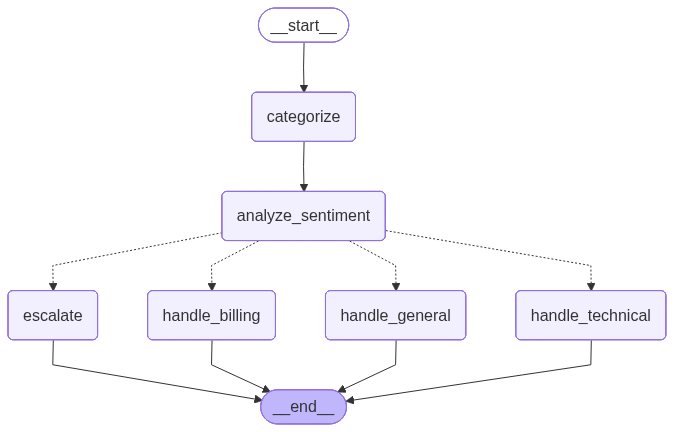

In [ ]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
def run_customer_support(query: str) -> Dict[str, str]:
    """Process a customer query through the LangGraph workflow.

    Args:
        query (str): The customer's query

    Returns:
        Dict[str, str]: A dictionary containing the query's category, sentiment, and response
    """
    results = app.invoke({"query": query})
    return {
        "category": results["category"],
        "sentiment": results["sentiment"],
        "response": results["response"]
    }

In [ ]:
# escalate

query = "My internet connection keeps dropping. Can you help?"
result = run_customer_support(query)
print(f"Query: {query}")
print(f"Category: {result['category']}")
print(f"Sentiment: {result['sentiment']}")
print(f"Response: {result['response']}")
print("\n")

Query: My internet connection keeps dropping. Can you help?
Category: Technical
Sentiment: Negative
Response: This query has been escalated to a human agent due to its negative sentiment.




In [ ]:
# handle_technical

query = "I need help talking to chatGPT"
result = run_customer_support(query)
print(f"Query: {query}")
print(f"Category: {result['category']}")
print(f"Sentiment: {result['sentiment']}")
print(f"Response: {result['response']}")
print("\n")

# handle_billing

query = "where can i find my receipt?"
result = run_customer_support(query)
print(f"Query: {query}")
print(f"Category: {result['category']}")
print(f"Sentiment: {result['sentiment']}")
print(f"Response: {result['response']}")
print("\n")

# handle_general

query = "What are your business hours?"
result = run_customer_support(query)
print(f"Query: {query}")
print(f"Category: {result['category']}")
print(f"Sentiment: {result['sentiment']}")
print(f"Response: {result['response']}")

Query: I need help talking to chatGPT
Category: Technical
Sentiment: Neutral
Response: Hello,

Thank you for reaching out for technical support. To communicate with ChatGPT, you can simply start typing your message in the chatbox provided on the platform. ChatGPT is designed to respond to your queries and engage in conversation based on the input you provide.

If you are experiencing any specific issues while trying to communicate with ChatGPT, please provide more details so that we can assist you further. This could include any error messages you are receiving, difficulties in understanding the responses, or any other challenges you are facing.

We are here to help and will do our best to ensure you have a smooth experience interacting with ChatGPT. Thank you for your patience and cooperation.


Query: where can i find my receipt?
Category: Billing
Sentiment: Neutral
Response: Thank you for reaching out. To locate your receipt, please check your email inbox for a confirmation email fr